### Import Libraries and Set Up Quandl

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Try to use Dubai font, fallback to DejaVu if not available
plt.rcParams['font.family'] = 'Dubai'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# General style improvements
sns.set_theme(context='notebook', style='whitegrid', palette='cool', font='Dubai', font_scale=1.2)

# High-res, anti-aliased, clean plots
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#FAFAFA'
plt.rcParams['axes.edgecolor'] = '#E0E0E0'
plt.rcParams['grid.color'] = '#E0E0E0'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Insert API key
quandl.ApiConfig.api_key = 'X3tcyMQPpg6kMEKXqZ71'

### Choose and Import Dataset

In [58]:
# data = quandl.get('FRED/NROU') # After many attemps and receiveing QuandlError: (Status 403), it seems that this way cannot be pursued anyfurther.

### Import Dataset

In [4]:
# Update path
file_path = r'C:\Users\moein\anaconda3\06_World Happiness Report 2024\02 Data\Prepared Data\Cleaned_World_Happiness_2024.csv'
df = pd.read_csv(file_path)

# Preview data
print(df.head())

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0        

### Subset Data to One Country

In [5]:
# Filter for country and set time index
country = "Germany"  # Change as needed
df_c = df[df['Country name'] == country].copy()
df_c['year'] = pd.to_datetime(df_c['year'], format='%Y')
df_c.set_index('year', inplace=True)

I selected Germany for time-series analysis because it has a continuous, annual record across all years and variables, allowing us to reliably analyze and visualize time-dependent trends.

In [21]:
# Helper Functions

def plot_series(ts, ylabel, title, color="#1768AC"):
    fig, ax = plt.subplots(figsize=(11, 5))
    ax.plot(ts, marker='o', color=color, linewidth=2, alpha=0.85)
    ax.set_title(title, fontsize=17, fontweight="bold", color="#22223b", pad=16)
    ax.set_ylabel(ylabel, fontsize=15, fontweight="semibold")
    ax.set_xlabel("")
    ax.set_facecolor("#f8fafc")
    ax.grid(True, alpha=0.15)
    # subtle shading under line
    ax.fill_between(ts.index, ts, color=color, alpha=0.10)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    plt.tight_layout()
    plt.show()

def decompose_and_plot(ts, title):
    result = seasonal_decompose(ts, model='additive', period=1)
    fig = result.plot()
    fig.set_size_inches(12, 8)
    fig.suptitle(title, y=1.02, fontsize=16, fontweight="bold", color="#0C285E")
    plt.tight_layout()
    plt.show()
    return result

def dickey_fuller(ts, name):
    ts_clean = ts.dropna()
    stat, p, _, _, crit, _ = adfuller(ts_clean)
    print(f"Dickey-Fuller Test for {name}:")
    print(f"  Test statistic = {stat:.3f}")
    print(f"  p-value       = {p:.4f}")
    print(f"  Critical Values: {crit}")
    print("  Stationary" if p < 0.05 else "  Not stationary")
    print("-" * 45)

In [7]:
def save_and_show(fig, filename):
    save_path = fr"C:\Users\moein\anaconda3\06_World Happiness Report 2024\04 Analysis\6.6_{filename}.jpg"
    fig.savefig(save_path, dpi=600, bbox_inches='tight', format='jpeg')
    plt.show()
    plt.close(fig)

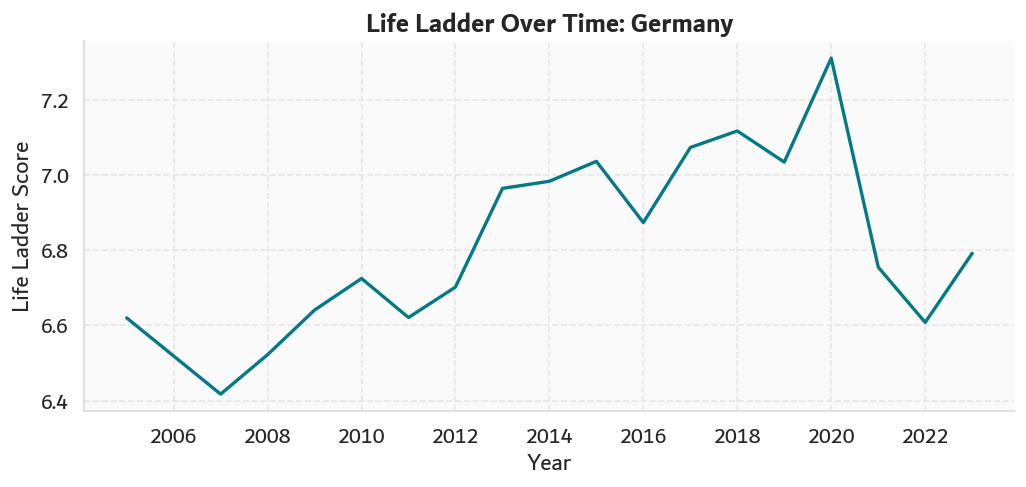

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_c.index, df_c['Life Ladder'], color="#057985", linewidth=2)
ax.set_title(f"Life Ladder Over Time: {country}", fontsize=16, fontweight='semibold')
ax.set_ylabel("Life Ladder Score")
ax.set_xlabel("Year")
ax.grid(True, linestyle='--', alpha=0.7)
save_and_show(fig, f"life_ladder_over_time_{country}")

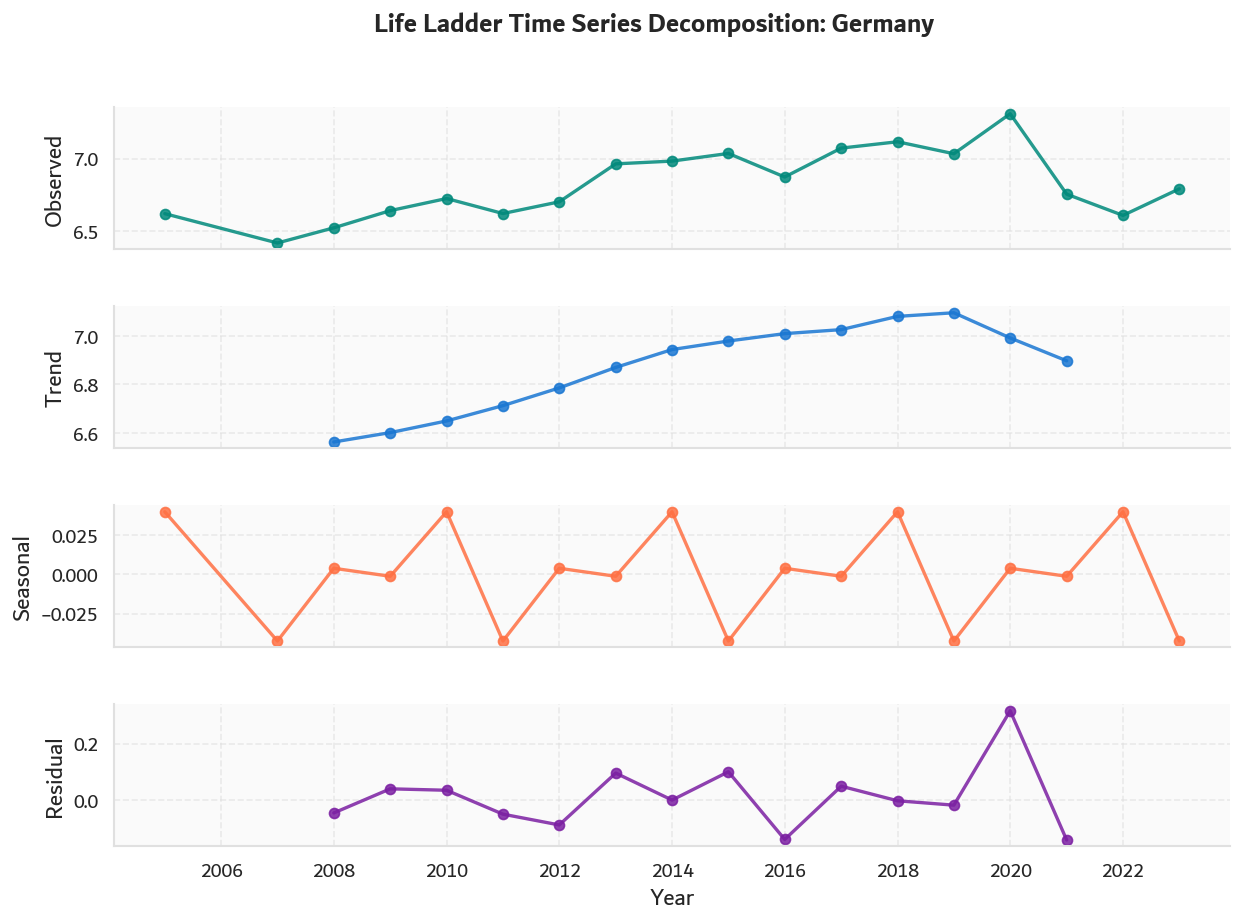

In [23]:
result = seasonal_decompose(df_c['Life Ladder'].dropna(), model='additive', period=4)

# Custom colors
obs_color = "#00897b"
trend_color = "#1976d2"
seasonal_color = "#ff7043"
resid_color = "#7b1fa2"

fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True, gridspec_kw={'hspace': 0.4})
fig.suptitle(f"Life Ladder Time Series Decomposition: {country}",
             fontsize=16, fontweight='semibold', fontfamily='Dubai')

# Observed
axs[0].plot(result.observed, color=obs_color, marker='o', linestyle='-', linewidth=2, alpha=0.85)
axs[0].set_ylabel("Observed", fontfamily='Dubai')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Trend
axs[1].plot(result.trend, color=trend_color, marker='o', linestyle='-', linewidth=2, alpha=0.85)
axs[1].set_ylabel("Trend", fontfamily='Dubai')
axs[1].grid(True, linestyle='--', alpha=0.6)

# Seasonal
axs[2].plot(result.seasonal, color=seasonal_color, marker='o', linestyle='-', linewidth=2, alpha=0.85)
axs[2].set_ylabel("Seasonal", fontfamily='Dubai')
axs[2].grid(True, linestyle='--', alpha=0.6)

# Residual
axs[3].plot(result.resid, color=resid_color, marker='o', linestyle='-', linewidth=2, alpha=0.85)
axs[3].set_ylabel("Residual", fontfamily='Dubai')
axs[3].set_xlabel("Year", fontfamily='Dubai')
axs[3].grid(True, linestyle='--', alpha=0.6)

for ax in axs:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

save_and_show(fig, f"life_ladder_decomposition_{country}")

In [12]:
dickey_fuller(df_c['Life Ladder'], "Life Ladder")

Dickey-Fuller Test for Life Ladder:
  Test statistic = -7.897
  p-value       = 0.0000
  Critical Values: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
  Stationary
---------------------------------------------


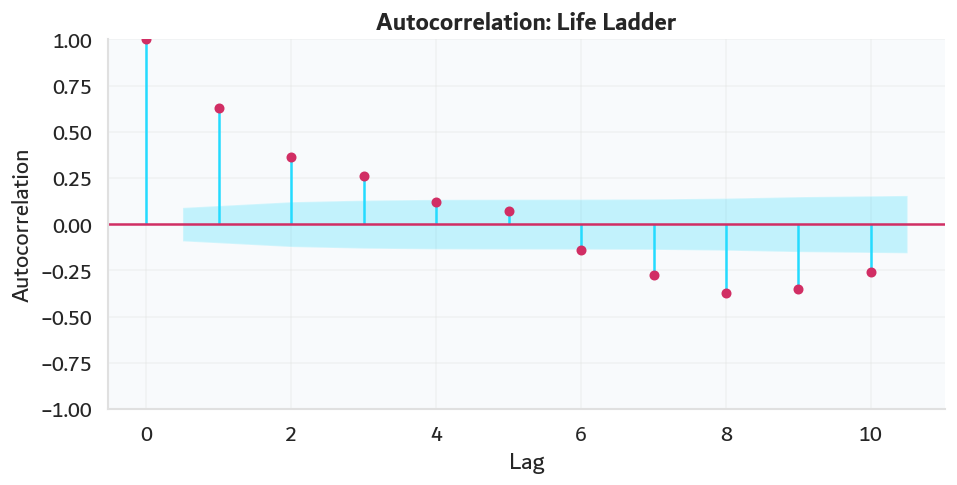

In [25]:
fig, ax = plt.subplots(figsize=(9, 4))
plot_acf(df_c['Life Ladder'].dropna(), ax=ax, lags=10, color="#D12E64", alpha=0.7)
ax.set_title('Autocorrelation: Life Ladder', fontsize=15, fontweight='semibold', fontfamily='Dubai')
ax.set_facecolor("#f8fafc")
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
save_and_show(fig, f"life_ladder_acf_{country}")